In [26]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10


In [27]:
cpiData = pd.read_csv("cpiData (complete)/cpiCanada.csv")

cpiData = cpiData[['All-items']]



In [28]:
cpiData['Date'] =  date_rng[[0]]

In [29]:
cpiData['Date']= pd.to_datetime(cpiData['Date'], infer_datetime_format = True)


In [30]:
cpiData = cpiData.set_index(['Date'])

In [31]:
from datetime import datetime 
cpiData.head()

,All-items
Date,
2010-01-31,115.1
2010-02-28,115.6
2010-03-31,115.6
2010-04-30,116.0
2010-05-31,116.3


C:\Users\carlo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


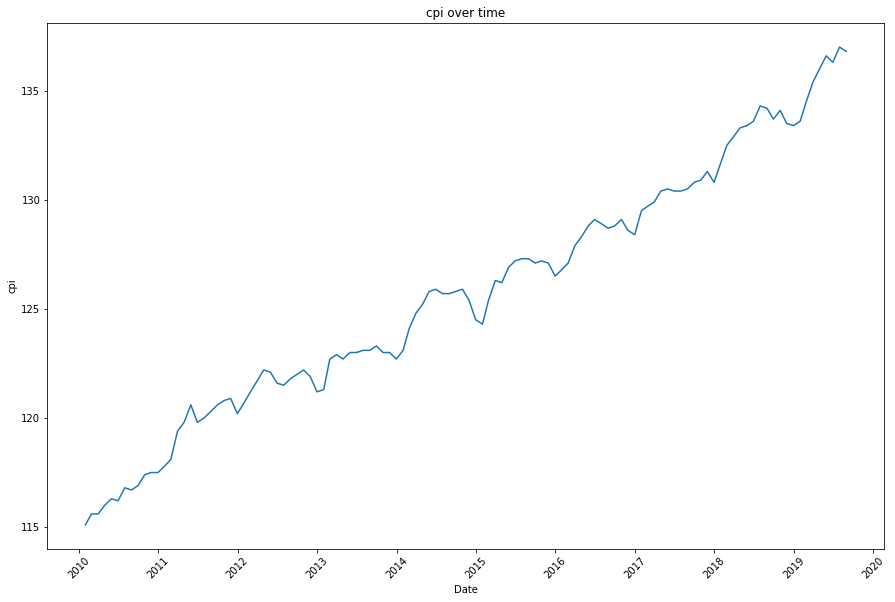

In [32]:
plt.xlabel('Date')
plt.ylabel('cpi')
plt.title('cpi over time')
plt.plot(cpiData)
plt.xticks(rotation = 45)
plt.subplots_adjust(bottom=0.15)

In [33]:
# Rolling Statistics Mean
rollingMeanCPI = cpiData.rolling(window=12).mean()

print(rollingMeanCPI)

             All-items
Date                  
2010-01-31         NaN
2010-02-28         NaN
2010-03-31         NaN
2010-04-30         NaN
2010-05-31         NaN
2010-06-30         NaN
2010-07-31         NaN
2010-08-31         NaN
2010-09-30         NaN
2010-10-31         NaN
2010-11-30         NaN
2010-12-31  116.466667
2011-01-31  116.691667
2011-02-28  116.900000
2011-03-31  117.216667
2011-04-30  117.533333
2011-05-31  117.891667
2011-06-30  118.191667
2011-07-31  118.458333
2011-08-31  118.758333
2011-09-30  119.066667
2011-10-31  119.350000
2011-11-30  119.633333
2011-12-31  119.858333
2012-01-31  120.100000
2012-02-29  120.358333
2012-03-31  120.550000
2012-04-30  120.750000
2012-05-31  120.875000
2012-06-30  121.025000
...                ...
2017-03-31  128.983333
2017-04-30  129.158333
2017-05-31  129.300000
2017-06-30  129.408333
2017-07-31  129.533333
2017-08-31  129.683333
2017-09-30  129.850000
2017-10-31  130.000000
2017-11-30  130.225000
2017-12-31  130.425000
2018-01-31 

In [34]:
# Rolling Statistics Standard Deviation

rollingSTDCPI = cpiData.rolling(window =12).std()
print(rollingSTDCPI)

            All-items
Date                 
2010-01-31        NaN
2010-02-28        NaN
2010-03-31        NaN
2010-04-30        NaN
2010-05-31        NaN
2010-06-30        NaN
2010-07-31        NaN
2010-08-31        NaN
2010-09-30        NaN
2010-10-31        NaN
2010-11-30        NaN
2010-12-31   0.800379
2011-01-31   0.759735
2011-02-28   0.775769
2011-03-31   0.952350
2011-04-30   1.126808
2011-05-31   1.358782
2011-06-30   1.348709
2011-07-31   1.364790
2011-08-31   1.338560
2011-09-30   1.297083
2011-10-31   1.271005
2011-11-30   1.197978
2011-12-31   0.997687
2012-01-31   0.781607
2012-02-29   0.533357
2012-03-31   0.569689
2012-04-30   0.690849
2012-05-31   0.789850
2012-06-30   0.736237
...               ...
2017-03-31   0.500606
2017-04-30   0.597660
2017-05-31   0.698049
2017-06-30   0.762124
2017-07-31   0.793534
2017-08-31   0.791814
2017-09-30   0.799432
2017-10-31   0.814639
2017-11-30   0.764110
2017-12-31   0.517204
2018-01-31   0.548483
2018-02-28   0.701243
2018-03-31

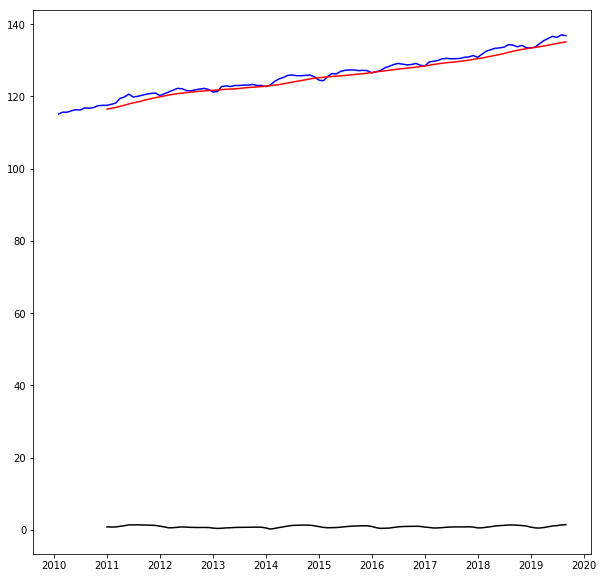

In [35]:
# Plotting the rolling statistics 
rcParams['figure.figsize'] = 10,10

cpiDataGraph = plt.plot(cpiData, color = 'blue', label = 'Original')
rolligMeanGraph = plt.plot(rollingMeanCPI, color = 'red', label = 'Rolling Mean')
rollingSTDGraph = plt.plot(rollingSTDCPI, color = 'black', label = 'Rolling STD')

In [36]:
# Preform the dickey-fuller test: 
from statsmodels.tsa.stattools import adfuller 

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(cpiData['All-items'],autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Crticial Value (%s)'%key] = value 

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.231969
p-value                          0.973999
#Lags Used                      13.000000
Number of Observations Used    102.000000
Crticial Value (1%)             -3.496149
Crticial Value (5%)             -2.890321
Crticial Value (10%)            -2.582122
dtype: float64


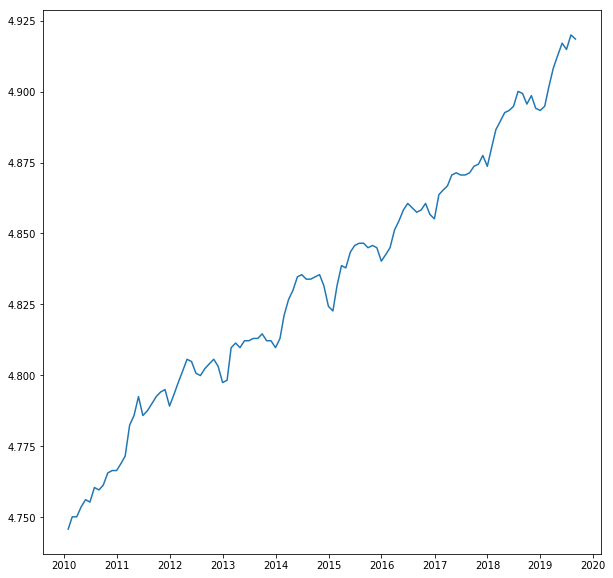

In [37]:
#Estimating trend  with log 
cpiDatalogScale = np.log(cpiData)
plt.plot(cpiDatalogScale)

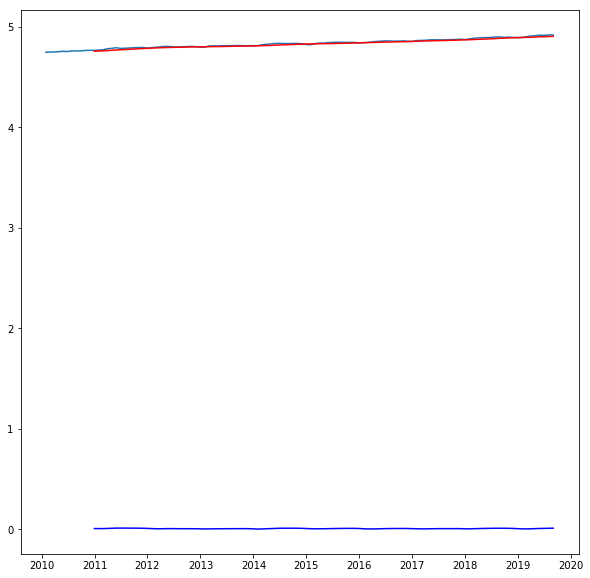

In [103]:
cpiDatalogScaleMovingAverage = cpiDatalogScale.rolling(window=12).mean()
cpiDatalogScaleSTD = cpiDatalogScale.rolling(window =12).std()

plt.plot(cpiDatalogScale)
plt.plot(cpiDatalogScaleMovingAverage, color = 'red')
plt.plot(cpiDatalogScaleSTD, color = 'blue')

In [39]:
logDataMinuslogMovingAverage = cpiDatalogScale - cpiDatalogScaleMovingAverage
logDataMinuslogMovingAverage

,All-items
Date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,NaN


In [40]:
#removing NAN values 
logDataMinuslogMovingAverage.dropna(inplace = True)
logDataMinuslogMovingAverage

,All-items
Date,
2010-12-31,0.008855
2011-01-31,0.009473
2011-02-28,0.010233
2011-03-31,0.018485
2011-04-30,0.019144
2011-05-31,0.022774
2011-06-30,0.013576
2011-07-31,0.012991
2011-08-31,0.012956


In [41]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity (timeseries):
    
    #Determing rolling statistics 
    movingAverage = timeseries.rolling(window =12).mean()
    movingSTD = timeseries.rolling(window =12).std()
    
    #Plot rolling statistics 
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Meand & STD')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['All-items'], autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Crticial Value (%s)'%key] = value 
        
    print(dfoutput)


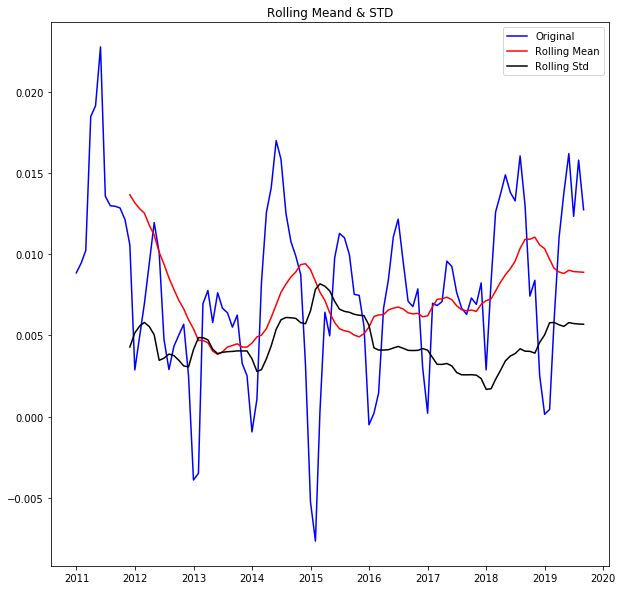

Results of Dickey-Fuller Test:
Test Statistics                -3.514638
p-value                         0.007619
#Lags used                     13.000000
Number of Observations Used    91.000000
Crticial Value (1%)            -3.504343
Crticial Value (5%)            -2.893866
Crticial Value (10%)           -2.584015
dtype: float64


In [42]:
test_stationarity(logDataMinuslogMovingAverage)

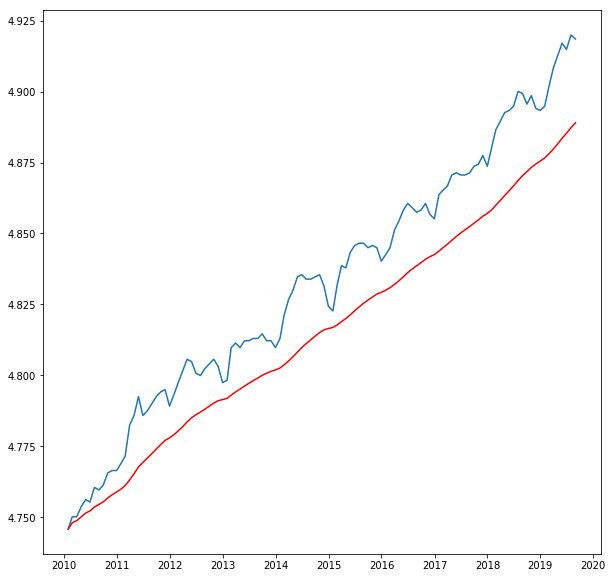

In [43]:
#The weighted Average of Time-Series
exponentialDecayWeightedAverage = cpiDatalogScale.ewm(halflife = 12, min_periods = 0 , adjust = True).mean()
plt.plot(cpiDatalogScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

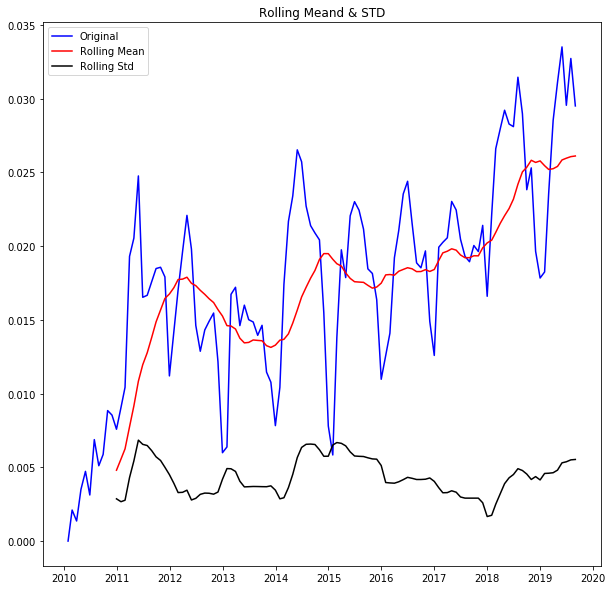

Results of Dickey-Fuller Test:
Test Statistics                 -2.160668
p-value                          0.220829
#Lags used                      13.000000
Number of Observations Used    102.000000
Crticial Value (1%)             -3.496149
Crticial Value (5%)             -2.890321
Crticial Value (10%)            -2.582122
dtype: float64


In [44]:
cpiLogMinusMovingExponentialDecayAverage =  cpiDatalogScale - exponentialDecayWeightedAverage
test_stationarity(cpiLogMinusMovingExponentialDecayAverage)

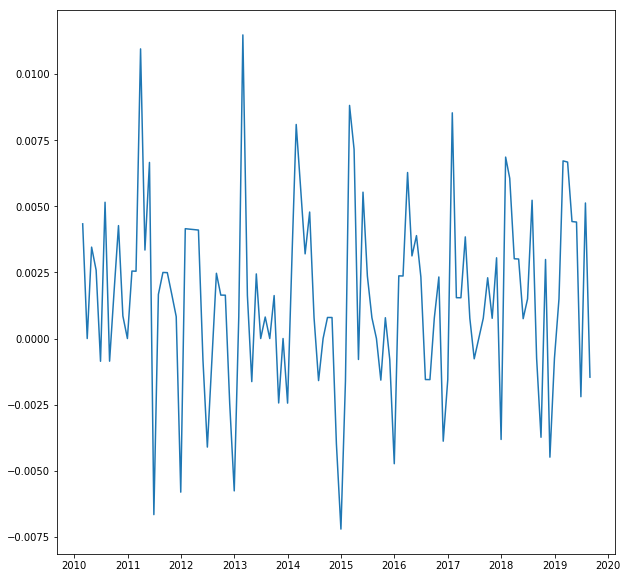

In [45]:
datasetLogDiffShifting  = cpiDatalogScale - cpiDatalogScale.shift()
plt.plot(datasetLogDiffShifting)

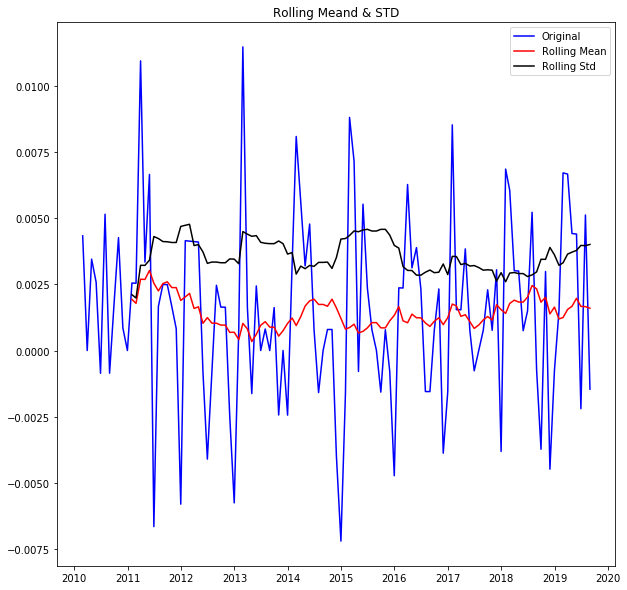

Results of Dickey-Fuller Test:
Test Statistics                 -2.795199
p-value                          0.058963
#Lags used                      13.000000
Number of Observations Used    101.000000
Crticial Value (1%)             -3.496818
Crticial Value (5%)             -2.890611
Crticial Value (10%)            -2.582277
dtype: float64


In [46]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

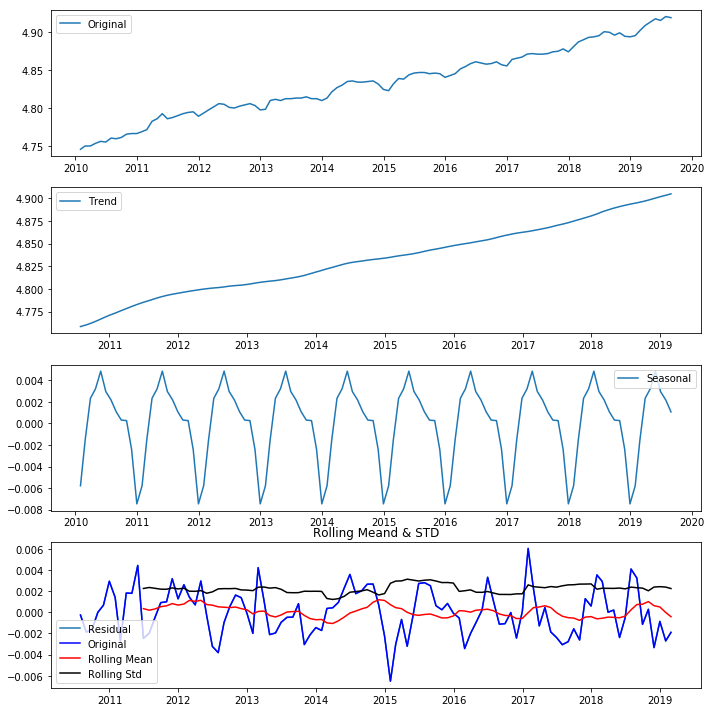

Results of Dickey-Fuller Test:
Test Statistics               -6.141823e+00
p-value                        7.937438e-08
#Lags used                     1.000000e+00
Number of Observations Used    1.020000e+02
Crticial Value (1%)           -3.496149e+00
Crticial Value (5%)           -2.890321e+00
Crticial Value (10%)          -2.582122e+00
dtype: float64


In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(cpiDatalogScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(cpiDatalogScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual 
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

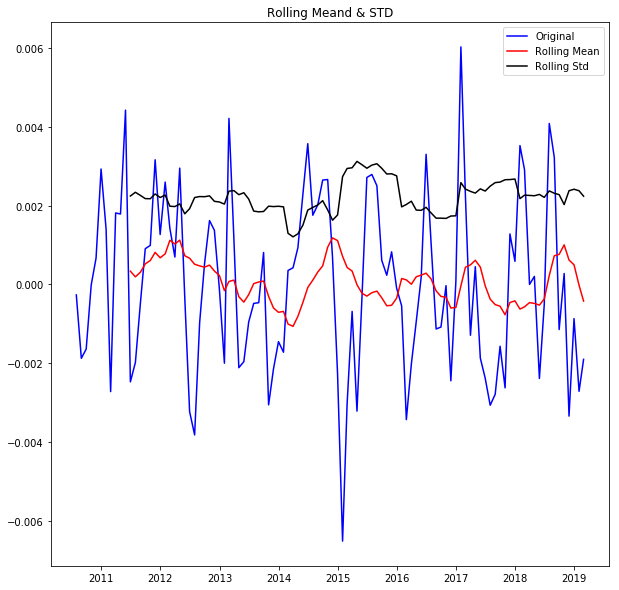

Results of Dickey-Fuller Test:
Test Statistics               -6.141823e+00
p-value                        7.937438e-08
#Lags used                     1.000000e+00
Number of Observations Used    1.020000e+02
Crticial Value (1%)           -3.496149e+00
Crticial Value (5%)           -2.890321e+00
Crticial Value (10%)          -2.582122e+00
dtype: float64


In [48]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

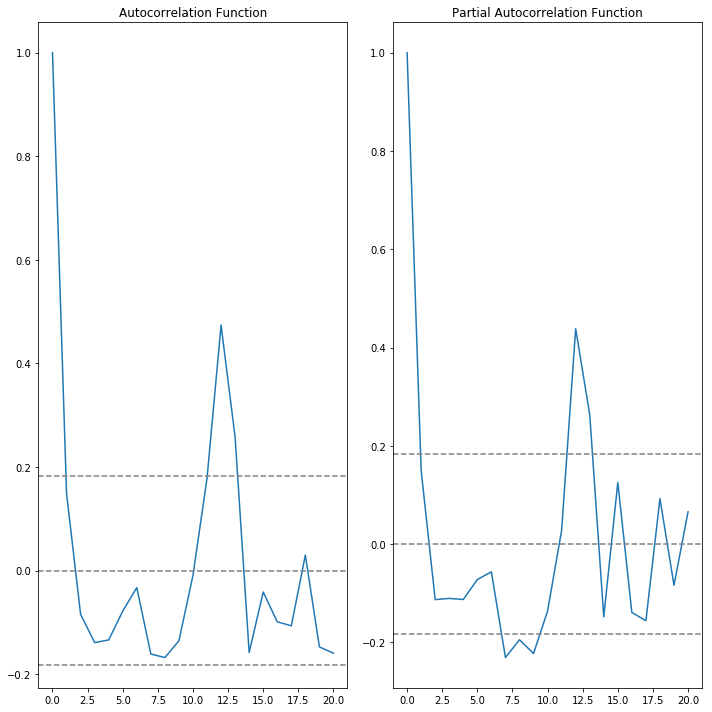

In [49]:
# ACF graph and PACF plots: 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method= 'ols')

# Plot ACF: AutoCorrelation function: 
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF: Partial Autocorrelation Function: 

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\carlo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\carlo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
No handles with labels found to put in legend.


plotting AR model


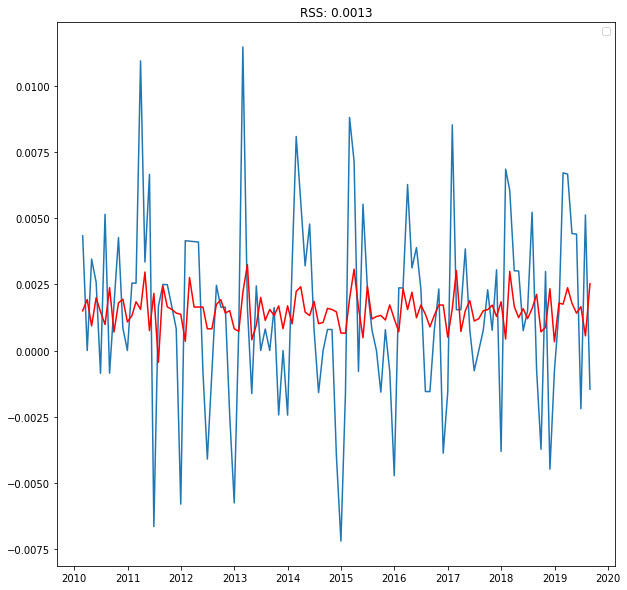

In [50]:
# ARIMA
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(cpiDatalogScale, order = (2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["All-items"])**2))
plt.legend(loc='best')
print('plotting AR model')

C:\Users\carlo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Plotting AR model


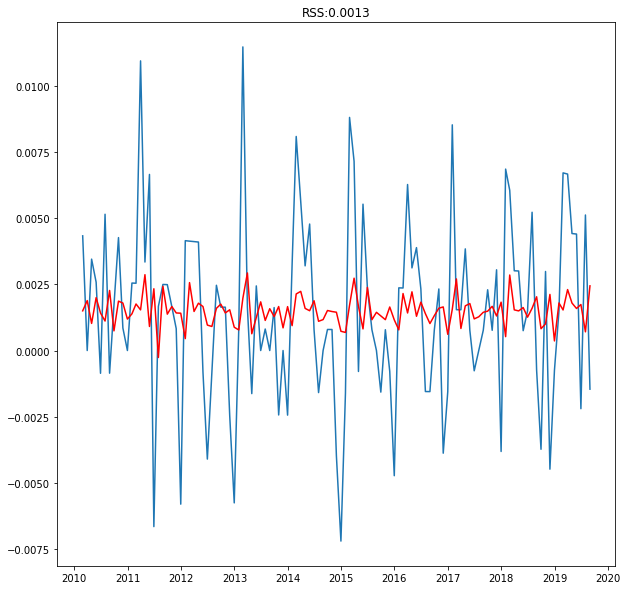

In [51]:
# MA model
model = ARIMA(cpiDatalogScale, order =(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['All-items'])**2))
print('Plotting AR model')

C:\Users\carlo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS:0.0012')

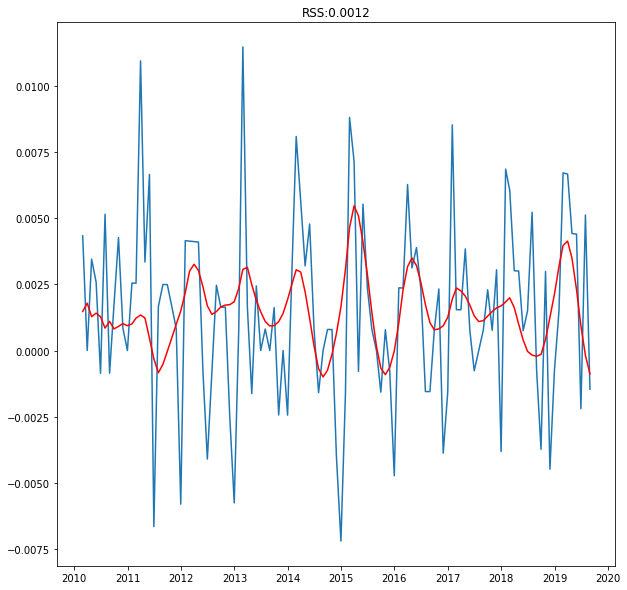

In [52]:
# ARIMA model:

model = ARIMA(cpiDatalogScale, order = (2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS:%.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['All-items'])**2))

In [53]:
# Creating the prediction 

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff)

Date
2010-02-28    0.001475
2010-03-31    0.001790
2010-04-30    0.001279
2010-05-31    0.001413
2010-06-30    0.001277
2010-07-31    0.000847
2010-08-31    0.001102
2010-09-30    0.000816
2010-10-31    0.000912
2010-11-30    0.001014
2010-12-31    0.000939
2011-01-31    0.001007
2011-02-28    0.001223
2011-03-31    0.001344
2011-04-30    0.001231
2011-05-31    0.000462
2011-06-30   -0.000314
2011-07-31   -0.000840
2011-08-31   -0.000520
2011-09-30   -0.000035
2011-10-31    0.000485
2011-11-30    0.000992
2011-12-31    0.001494
2012-01-31    0.002185
2012-02-29    0.002997
2012-03-31    0.003261
2012-04-30    0.003028
2012-05-31    0.002402
2012-06-30    0.001691
2012-07-31    0.001366
                ...   
2017-03-31    0.002253
2017-04-30    0.002054
2017-05-31    0.001720
2017-06-30    0.001310
2017-07-31    0.001096
2017-08-31    0.001128
2017-09-30    0.001299
2017-10-31    0.001475
2017-11-30    0.001610
2017-12-31    0.001687
2018-01-31    0.001838
2018-02-28    0.001992
2018-0

In [54]:
# Convert to cumulative sum 
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
2010-02-28    0.001475
2010-03-31    0.003265
2010-04-30    0.004545
2010-05-31    0.005958
2010-06-30    0.007235
2010-07-31    0.008082
2010-08-31    0.009185
2010-09-30    0.010001
2010-10-31    0.010913
2010-11-30    0.011927
2010-12-31    0.012866
2011-01-31    0.013872
2011-02-28    0.015096
2011-03-31    0.016439
2011-04-30    0.017670
2011-05-31    0.018132
2011-06-30    0.017818
2011-07-31    0.016978
2011-08-31    0.016457
2011-09-30    0.016423
2011-10-31    0.016908
2011-11-30    0.017899
2011-12-31    0.019393
2012-01-31    0.021579
2012-02-29    0.024575
2012-03-31    0.027837
2012-04-30    0.030865
2012-05-31    0.033266
2012-06-30    0.034957
2012-07-31    0.036323
                ...   
2017-03-31    0.131924
2017-04-30    0.133978
2017-05-31    0.135698
2017-06-30    0.137008
2017-07-31    0.138104
2017-08-31    0.139231
2017-09-30    0.140531
2017-10-31    0.142006
2017-11-30    0.143615
2017-12-31    0.145302
2018-01-31    0.147140
2018-02-28    0.149132
2018-0

In [55]:
predictions_ARIMA_log = pd.Series(cpiDatalogScale['All-items'].ix[0], index=cpiDatalogScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2010-01-31    4.745801
2010-02-28    4.747277
2010-03-31    4.749067
2010-04-30    4.750346
2010-05-31    4.751759
2010-06-30    4.753037
2010-07-31    4.753884
2010-08-31    4.754986
2010-09-30    4.755802
2010-10-31    4.756714
2010-11-30    4.757729
2010-12-31    4.758667
2011-01-31    4.759674
2011-02-28    4.760897
2011-03-31    4.762241
2011-04-30    4.763471
2011-05-31    4.763933
2011-06-30    4.763619
2011-07-31    4.762779
2011-08-31    4.762259
2011-09-30    4.762224
2011-10-31    4.762709
2011-11-30    4.763701
2011-12-31    4.765195
2012-01-31    4.767380
2012-02-29    4.770377
2012-03-31    4.773638
2012-04-30    4.776666
2012-05-31    4.779068
2012-06-30    4.780758
                ...   
2017-03-31    4.877725
2017-04-30    4.879779
2017-05-31    4.881499
2017-06-30    4.882809
2017-07-31    4.883905
2017-08-31    4.885033
2017-09-30    4.886332
2017-10-31    4.887807
2017-11-30    4.889417
2017-12-31    4.891104
2018-01-31    4.892941
2018-02-28    4.894933
2018-0

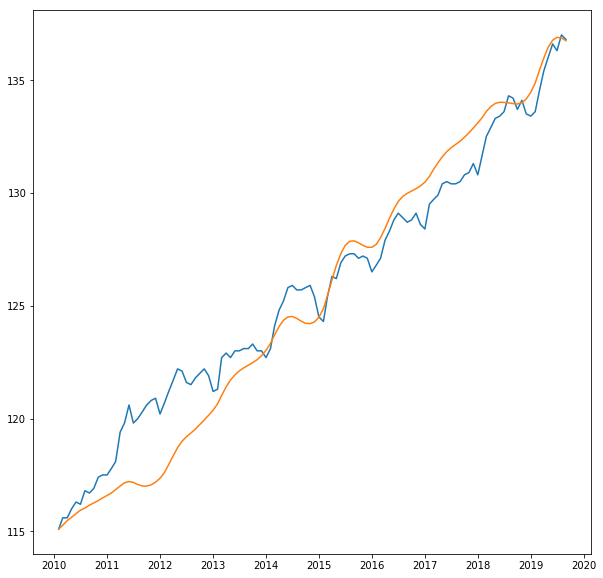

In [56]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(cpiData)
plt.plot(predictions_ARIMA)

In [57]:
cpiDatalogScale

,All-items
Date,
2010-01-31,4.745801
2010-02-28,4.750136
2010-03-31,4.750136
2010-04-30,4.753590
2010-05-31,4.756173
2010-06-30,4.755313
2010-07-31,4.760463
2010-08-31,4.759607
2010-09-30,4.761319


(array([4.91727093, 4.91630166, 4.91611088, 4.91698355, 4.91894979,
        4.92180214, 4.9251623 , 4.92857827, 4.93162828, 4.93400849,
        4.93558719, 4.93641705, 4.93670654, 4.93676069, 4.93690655,
        4.93742097, 4.93847582, 4.94011093, 4.94223784, 4.9446708 ,
        4.94717567, 4.94952475, 4.95154505, 4.95315029, 4.95435135,
        4.95524485, 4.95598442, 4.95674238, 4.95767104, 4.9588718 ,
        4.96037824, 4.96215515, 4.96411255, 4.96613014, 4.9680859 ,
        4.9698825 , 4.97146584, 4.97283267, 4.9740265 , 4.97512393,
        4.9762151 , 4.97738306, 4.97868666, 4.9801501 , 4.98176103,
        4.98347659, 4.98523546, 4.98697275, 4.98863425, 4.9901871 ,
        4.99162481, 4.99296622, 4.99424909, 4.99552021, 4.99682453,
        4.99819568, 4.9996498 , 5.00118371, 5.0027774 , 5.0043999 ,
        5.00601695, 5.00759865, 5.00912548, 5.01059152, 5.01200447,
        5.01338268, 5.01475026, 5.01613135, 5.01754493, 5.01900125,
        5.0205004 , 5.0220333 , 5.02358445, 5.02

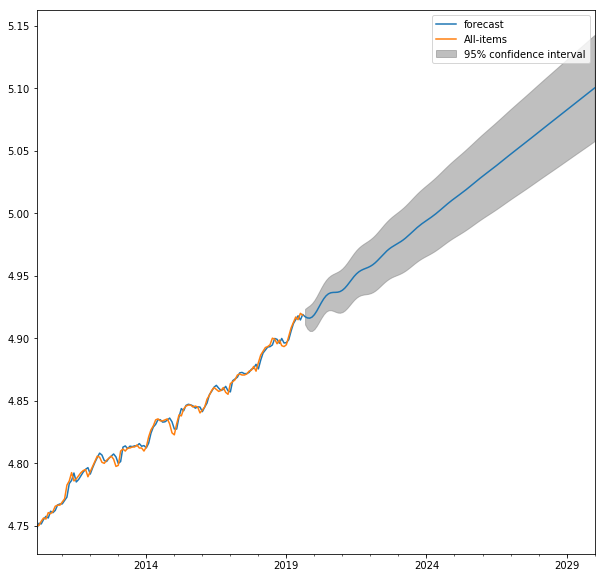

In [76]:
results_ARIMA.plot_predict(1,240)
x= results_ARIMA.forecast(steps=124)
x

In [99]:
#Upperbound Confidence Interval
#UBCI =
cpiForecastValues = pd.DataFrame(x[0])
cpiForecastValues.rename(columns={0:'forecastedCPI'}, inplace = True)
cpiForecastValues   
cpiForecastValues= np.exp(cpiForecastValues)
cpiForecastValues['Date']= forecastDate_rng[0]

In [101]:
cpiForecastValues.set_index('Date')

,forecastedCPI
Date,
2019-09-30,136.629233
2019-10-31,136.496867
2019-11-30,136.470828
2019-12-31,136.589974
2020-01-31,136.858807
2020-02-29,137.249734
2020-03-31,137.711690
2020-04-30,138.182914
2020-05-31,138.605016


array([0.00319584, 0.00443864, 0.00520784, 0.00566358, 0.005915  ,
       0.00605159, 0.00613793, 0.00621669, 0.00632189, 0.006488  ,
       0.0067429 , 0.00709099, 0.0075048 , 0.00793537, 0.00833321,
       0.00866547, 0.00892203, 0.00911164, 0.00925322, 0.00936793,
       0.00947502, 0.00959118, 0.00973035, 0.00990184, 0.0101073 ,
       0.01033904, 0.01058198, 0.01081866, 0.01103487, 0.01122314,
       0.01138326, 0.01152047, 0.01164294, 0.01175958, 0.01187872,
       0.01200709, 0.01214894, 0.01230508, 0.01247265, 0.01264584,
       0.0128176 , 0.01298162, 0.0131339 , 0.01327333, 0.01340139,
       0.01352137, 0.01363736, 0.01375346, 0.01387307, 0.01399834,
       0.01412984, 0.01426645, 0.01440575, 0.01454467, 0.01468031,
       0.01481058, 0.01493465, 0.01505289, 0.01516663, 0.01527776,
       0.01538828, 0.01549992, 0.01561381, 0.01573036, 0.01584914,
       0.01596912, 0.0160889 , 0.0162071 , 0.01632267, 0.01643507,
       0.01654436, 0.01665107, 0.01675609, 0.01686038, 0.01696

In [72]:
values

,0
0,0.003196
1,0.004439
2,0.005208
3,0.005664
4,0.005915
5,0.006052
6,0.006138
7,0.006217
8,0.006322
9,0.006488


In [61]:
len(values[0])

124

In [62]:
for value in range(0,len(values[0])):
    print(values)

            0
0    0.003196
1    0.004439
2    0.005208
3    0.005664
4    0.005915
5    0.006052
6    0.006138
7    0.006217
8    0.006322
9    0.006488
10   0.006743
11   0.007091
12   0.007505
13   0.007935
14   0.008333
15   0.008665
16   0.008922
17   0.009112
18   0.009253
19   0.009368
20   0.009475
21   0.009591
22   0.009730
23   0.009902
24   0.010107
25   0.010339
26   0.010582
27   0.010819
28   0.011035
29   0.011223
..        ...
94   0.018998
95   0.019094
96   0.019189
97   0.019283
98   0.019376
99   0.019469
100  0.019562
101  0.019654
102  0.019746
103  0.019838
104  0.019931
105  0.020022
106  0.020114
107  0.020205
108  0.020295
109  0.020384
110  0.020473
111  0.020562
112  0.020650
113  0.020737
114  0.020825
115  0.020912
116  0.020999
117  0.021085
118  0.021172
119  0.021258
120  0.021344
121  0.021429
122  0.021514
123  0.021599

[124 rows x 1 columns]
            0
0    0.003196
1    0.004439
2    0.005208
3    0.005664
4    0.005915
5    0.006052
6    0.006

            0
0    0.003196
1    0.004439
2    0.005208
3    0.005664
4    0.005915
5    0.006052
6    0.006138
7    0.006217
8    0.006322
9    0.006488
10   0.006743
11   0.007091
12   0.007505
13   0.007935
14   0.008333
15   0.008665
16   0.008922
17   0.009112
18   0.009253
19   0.009368
20   0.009475
21   0.009591
22   0.009730
23   0.009902
24   0.010107
25   0.010339
26   0.010582
27   0.010819
28   0.011035
29   0.011223
..        ...
94   0.018998
95   0.019094
96   0.019189
97   0.019283
98   0.019376
99   0.019469
100  0.019562
101  0.019654
102  0.019746
103  0.019838
104  0.019931
105  0.020022
106  0.020114
107  0.020205
108  0.020295
109  0.020384
110  0.020473
111  0.020562
112  0.020650
113  0.020737
114  0.020825
115  0.020912
116  0.020999
117  0.021085
118  0.021172
119  0.021258
120  0.021344
121  0.021429
122  0.021514
123  0.021599

[124 rows x 1 columns]
            0
0    0.003196
1    0.004439
2    0.005208
3    0.005664
4    0.005915
5    0.006052
6    0.006

In [95]:
from datetime import datetime 

date_rng = pd.date_range(start='2010-01', end = '2019-09', freq='M')
forecastDate_rng = pd.date_range(start = '2019-09', end = '2031-01',freq='M')

In [97]:
#date_rng
forecastDate_rng

DatetimeIndex(['2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30',
               ...
               '2030-03-31', '2030-04-30', '2030-05-31', '2030-06-30',
               '2030-07-31', '2030-08-31', '2030-09-30', '2030-10-31',
               '2030-11-30', '2030-12-31'],
              dtype='datetime64[ns]', length=136, freq='M')

In [98]:
forecastDate_rng = pd.DataFrame(forecastDate_rng)

In [22]:
pd._libs.tslib.Timestamp

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
date_rng= pd.DataFrame(date_rng)

In [24]:
date_rng

,0
0,2010-01-31
1,2010-02-28
2,2010-03-31
3,2010-04-30
4,2010-05-31
5,2010-06-30
6,2010-07-31
7,2010-08-31
8,2010-09-30
9,2010-10-31


In [25]:
date_rng

,0
0,2010-01-31
1,2010-02-28
2,2010-03-31
3,2010-04-30
4,2010-05-31
5,2010-06-30
6,2010-07-31
7,2010-08-31
8,2010-09-30
9,2010-10-31
